In [1]:
import torch
import torch.nn as nn
import numpy as np 
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import pandas as pd
%matplotlib inline

In [2]:
class simpleNN_iris(nn.Module):
    def __init__(self,in_dims=4,h1_units=8,h2_units=8,out_dims=3):
        super(simpleNN_iris,self).__init__()
        self.layer_in=nn.Linear(in_features=in_dims,out_features=h1_units)
        self.hidden_1=nn.Linear(in_features=h1_units,out_features=h2_units)
        self.layer_out=nn.Linear(in_features=h2_units,out_features=out_dims)
    def forward(self,x):
        h1=F.relu(self.layer_in(x))
        h2=F.relu(self.hidden_1(h1))
        op_layer=self.layer_out(h2)
        return(op_layer)
model=simpleNN_iris()   

In [3]:
df=pd.read_csv('C:\\Users\\sushanthsgradlaptop2\\Downloads\\PYTORCH_NOTEBOOKS\\PYTORCH_NOTEBOOKS\\Data\\iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
data=df.drop('target',axis=1)
X=data.values
y=df['target'].values
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [5]:
scaler=StandardScaler()
x_train_m=scaler.fit_transform(x_train)
x_test_m=scaler.transform(x_test)

In [6]:
train_loader=DataLoader(x_train_m,batch_size=10,shuffle=True)
test_loader=DataLoader(x_test_m,batch_size=10,shuffle=False)

In [7]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.1)

Epoch:0 Loss:1.1337050199508667
Epoch:10 Loss:1.0989325046539307
Epoch:20 Loss:1.098742127418518
Epoch:30 Loss:1.0980535745620728
Epoch:40 Loss:1.0980257987976074
Epoch:50 Loss:1.0980089902877808
Epoch:60 Loss:1.0979878902435303
Epoch:70 Loss:1.0979832410812378
Epoch:80 Loss:1.097983717918396
Epoch:90 Loss:1.0979822874069214


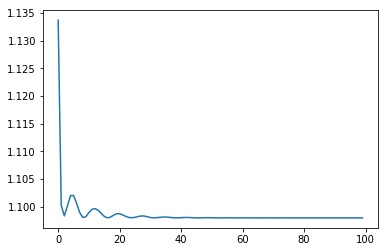

In [8]:
epochs=100
loss_track=[]
X_train=torch.tensor(x_train,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.long)
for i in range(epochs):
    y_pred=model(X_train)
    loss=criterion(y_pred,y_train)
    loss.backward()
    loss_track.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()
    if(i%10==0):
        print(f'Epoch:{i} Loss:{loss.item()}')
plt.plot(range(epochs),loss_track)